In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers=pd.read_csv('customers.csv')
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [3]:
df_loans=pd.read_csv('loans.csv')
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [4]:
df_bureau=pd.read_csv('bureau_data.csv')
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [5]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

n = 50000

# Customer IDs formatted C00001...
cust_ids = np.array([f"C{str(i).zfill(5)}" for i in range(1, n + 1)])

# Monthly income / inflow
inflow = np.random.normal(50000, 15000, n).clip(5000, None).astype(int)

# Monthly spend (bounded below by 0 and less than inflow)
spend = (inflow * np.random.uniform(0.2, 0.95, n)).astype(int)

# Past loan performance score (0=bad,1=average,2=good,3=excellent)
loan_perf = np.random.choice([0,1,2,3], size=n, p=[0.15,0.35,0.35,0.15])

# Count of previous loans
past_loans = np.random.poisson(2, n)

# Number of defaults historically
defaults = np.random.binomial(p=0.1, n=past_loans)

# Credit score dependent on loan performance + income randomness
base_score = 300 + (loan_perf * 150) + np.random.normal(0, 40, n)
credit_score = np.clip(base_score, 300, 900).astype(int)

# Account balance trend: inflow minus spend with noise
avg_balance = (inflow - spend) * np.random.uniform(0.5, 1.5, n)
avg_balance = avg_balance.clip(0, None).astype(int)

df_transaction = pd.DataFrame({
    "cust_id": cust_ids,
    "monthly_inflow": inflow,
    "monthly_spend": spend,
    "avg_monthly_balance": avg_balance,
    "past_loan_count": past_loans,
    "past_defaults": defaults,
    "loan_performance_rating": loan_perf,
    "credit_score": credit_score
})









In [6]:
df_transaction.head()

,cust_id,monthly_inflow,monthly_spend,avg_monthly_balance,past_loan_count,past_defaults,loan_performance_rating,credit_score
0,C00001,57450,11609,57376,1,0,2,509
1,C00002,47926,23334,12972,4,0,1,387
2,C00003,59715,52879,5740,2,0,2,605
3,C00004,72845,66348,7336,0,0,1,452
4,C00005,46487,11164,22432,0,0,3,793


In [7]:
df_transaction.shape

(50000, 8)

In [8]:
df=df_customers.merge(df_loans,on='cust_id')

In [9]:
df=df.merge(df_bureau,on='cust_id')


In [10]:
df=df.merge(df_transaction,on='cust_id')

In [11]:
df.shape

(50000, 40)

In [12]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,total_dpd,enquiry_count,credit_utilization_ratio,monthly_inflow,monthly_spend,avg_monthly_balance,past_loan_count,past_defaults,loan_performance_rating,credit_score
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,0,3,7,57450,11609,57376,1,0,2,509
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,60,5,4,47926,23334,12972,4,0,1,387
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,147,6,58,59715,52879,5740,2,0,2,605
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,87,5,26,72845,66348,7336,0,0,1,452
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,0,5,10,46487,11164,22432,0,0,3,793


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [14]:
df['default']=df['default'].astype('int')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

# data cleaning

In [17]:
df.isnull().mean()*100

cust_id                        0.000
age                            0.000
gender                         0.000
marital_status                 0.000
employment_status              0.000
income                         0.000
number_of_dependants           0.000
residence_type                 0.124
years_at_current_address       0.000
city                           0.000
state                          0.000
zipcode                        0.000
loan_id                        0.000
loan_purpose                   0.000
loan_type                      0.000
sanction_amount                0.000
loan_amount                    0.000
processing_fee                 0.000
gst                            0.000
net_disbursement               0.000
loan_tenure_months             0.000
principal_outstanding          0.000
bank_balance_at_application    0.000
disbursal_date                 0.000
installment_start_dt           0.000
default                        0.000
number_of_open_accounts        0.000
n

In [18]:
df['residence_type'].value_counts()

residence_type
Owned       28238
Mortgage    11819
Rented       9881
Name: count, dtype: int64

In [19]:
mode_residance=df["residence_type"].mode()[0]
mode_residance

'Owned'

In [20]:
df["residence_type"].fillna(mode_residance,inplace=True)

C:\Users\amres\AppData\Local\Temp\ipykernel_23152\3767873790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["residence_type"].fillna(mode_residance,inplace=True)


In [21]:
# checking for duplicate value
df.duplicated().sum()

np.int64(0)

# there is no duplicated rows present in the data

In [23]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio',
       'monthly_inflow', 'monthly_spend', 'avg_monthly_balance',
       'loan_performance_rating', 'credit_score'],
      dtype='object')

In [24]:
df.select_dtypes(include="object").columns

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [25]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio',
       'monthly_inflow', 'monthly_spend', 'avg_monthly_balance',
       'loan_performance_rating', 'credit_score']

columns_categorical = ['gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt']

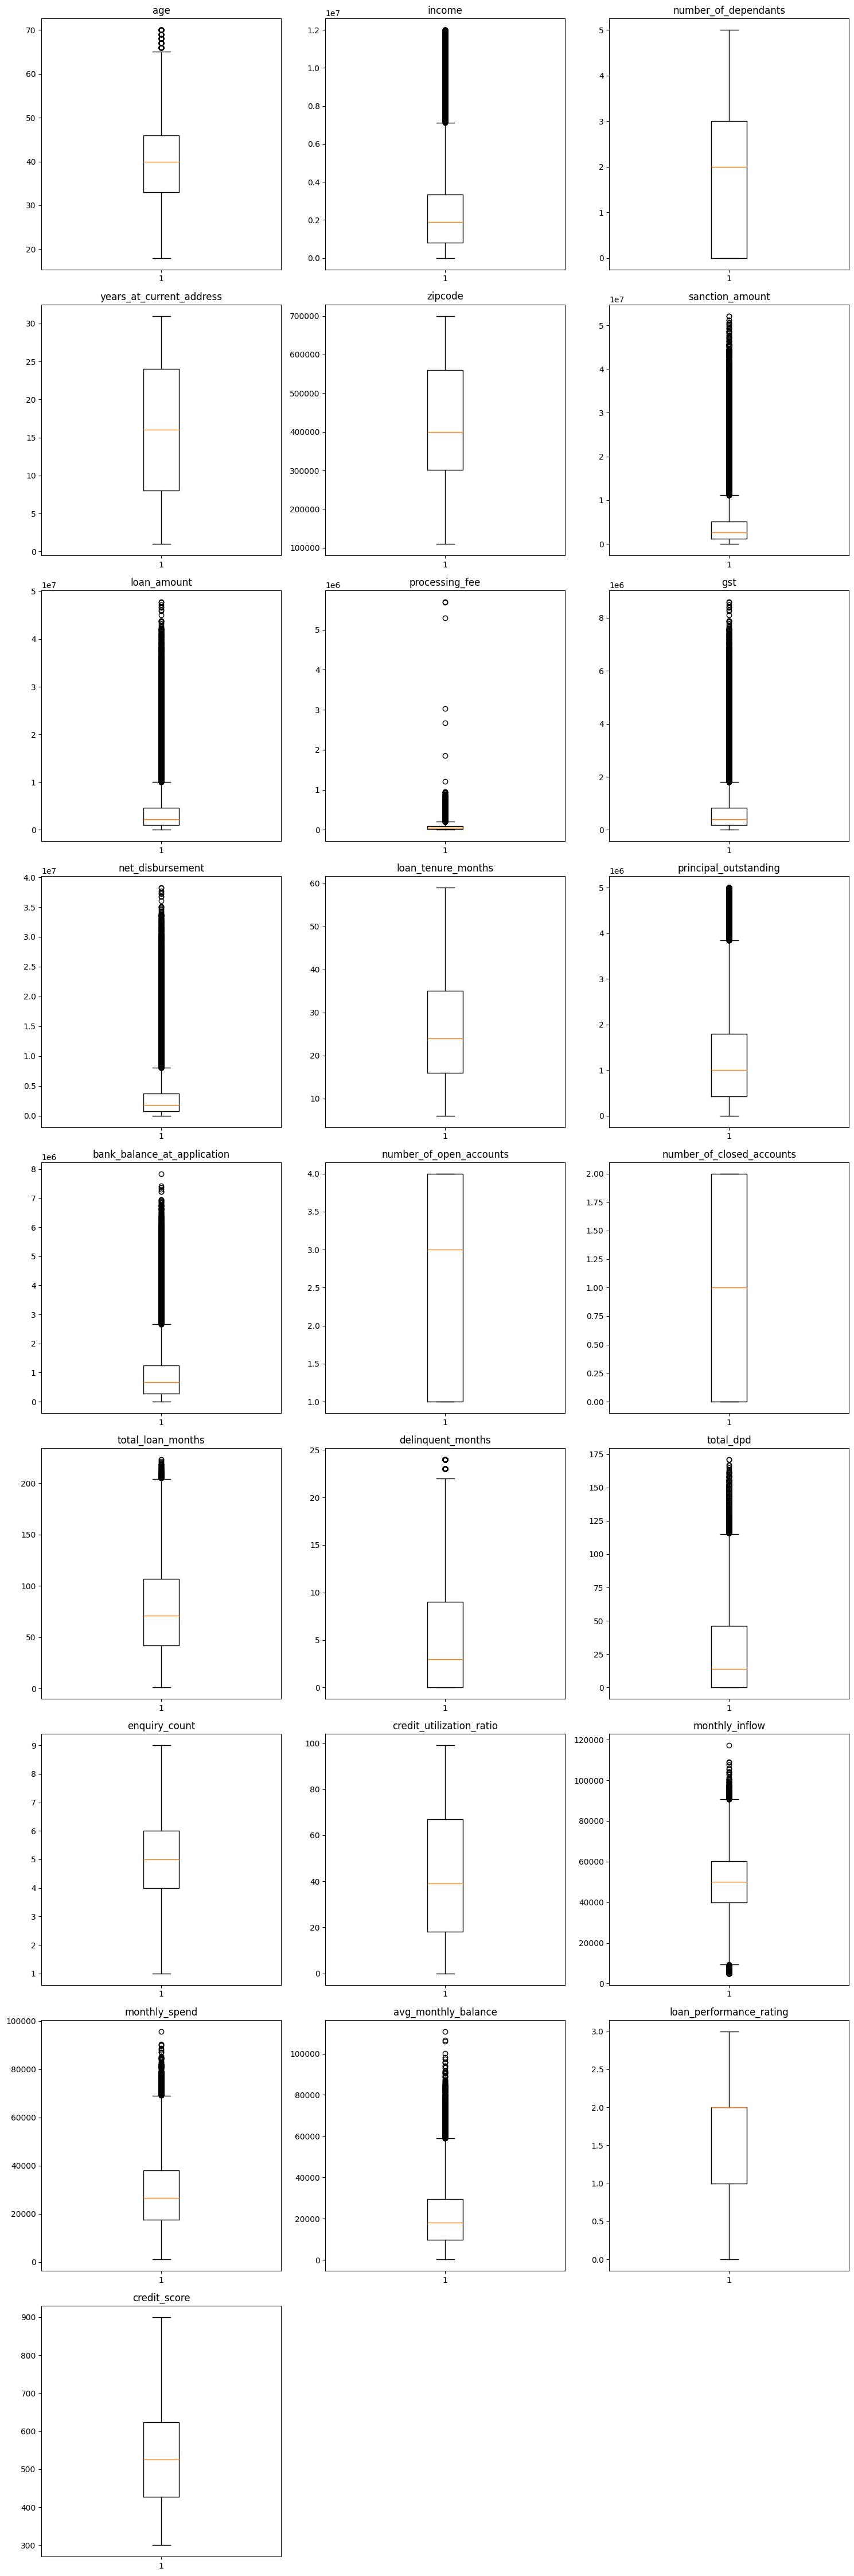

In [26]:
rows = (len(columns_continuous) + 2) //3
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten() 

for i, col in enumerate(columns_continuous):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [27]:
df['processing_fee'].describe()

count    5.000000e+04
mean     8.049471e+04
std      1.173123e+05
min      0.000000e+00
25%      1.934000e+04
50%      4.480000e+04
75%      9.224000e+04
max      5.698030e+06
Name: processing_fee, dtype: float64

In [28]:
df["loan_amount"].describe()

count    5.000000e+04
mean     3.999679e+06
std      5.376552e+06
min      0.000000e+00
25%      9.670000e+05
50%      2.240000e+06
75%      4.611000e+06
max      4.781900e+07
Name: loan_amount, dtype: float64

In [29]:
df[df['processing_fee']>0.03*df["loan_amount"]]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,total_dpd,enquiry_count,credit_utilization_ratio,monthly_inflow,monthly_spend,avg_monthly_balance,past_loan_count,past_defaults,loan_performance_rating,credit_score
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,5,3,92,74193,38207,34255,2,0,1,422
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,0,3,86,64670,26873,46607,0,0,2,614
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,31,6,26,40436,33648,9842,2,0,1,462
28174,C28175,36,F,Single,Self-Employed,1123000,1,Rented,31,Hyderabad,...,41,3,62,44226,29040,17196,1,0,1,393
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,65,3,2,68268,34658,35555,3,0,1,468
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,0,5,47,71585,19392,58808,0,0,3,741
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,33,3,32,46814,19856,33425,2,0,2,555


# there are some rows where processing fee are greater than loan_amount so i will remove this

In [31]:
df1=df[df["processing_fee"]<0.03*df['loan_amount']].copy()

In [32]:
for col in columns_categorical:
    print(col, "-->", df1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Delhi' 'Chennai' 'Kolkata' 'Bangalore' 'Pune' 'Jaipur' 'Lucknow'
 'Mumbai' 'Ahmedabad' 'Hyderabad']
state --> ['Delhi' 'Tamil Nadu' 'West Bengal' 'Karnataka' 'Maharashtra' 'Rajasthan'
 'Uttar Pradesh' 'Gujarat' 'Telangana']
loan_id --> ['L00001' 'L00002' 'L00003' ... 'L49998' 'L49999' 'L50000']
loan_purpose --> ['Auto' 'Home' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
disbursal_date --> ['2019-07-24' '2019-07-25' '2019-07-26' ... '2024-07-20' '2024-07-21'
 '2024-07-22']
installment_start_dt --> ['2019-08-10' '2019-08-15' '2019-08-21' ... '2024-08-17' '2024-08-20'
 '2024-08-19']


In [33]:
df1['loan_purpose'].value_counts()

loan_purpose
Personal     17451
Home         15025
Auto          9933
Education     7554
Personaal       22
Name: count, dtype: int64

In [34]:
df1["loan_purpose"]=df1["loan_purpose"].replace("Personaal","Personal")

In [35]:
df1["loan_purpose"].unique()

array(['Auto', 'Home', 'Personal', 'Education'], dtype=object)

# EDA

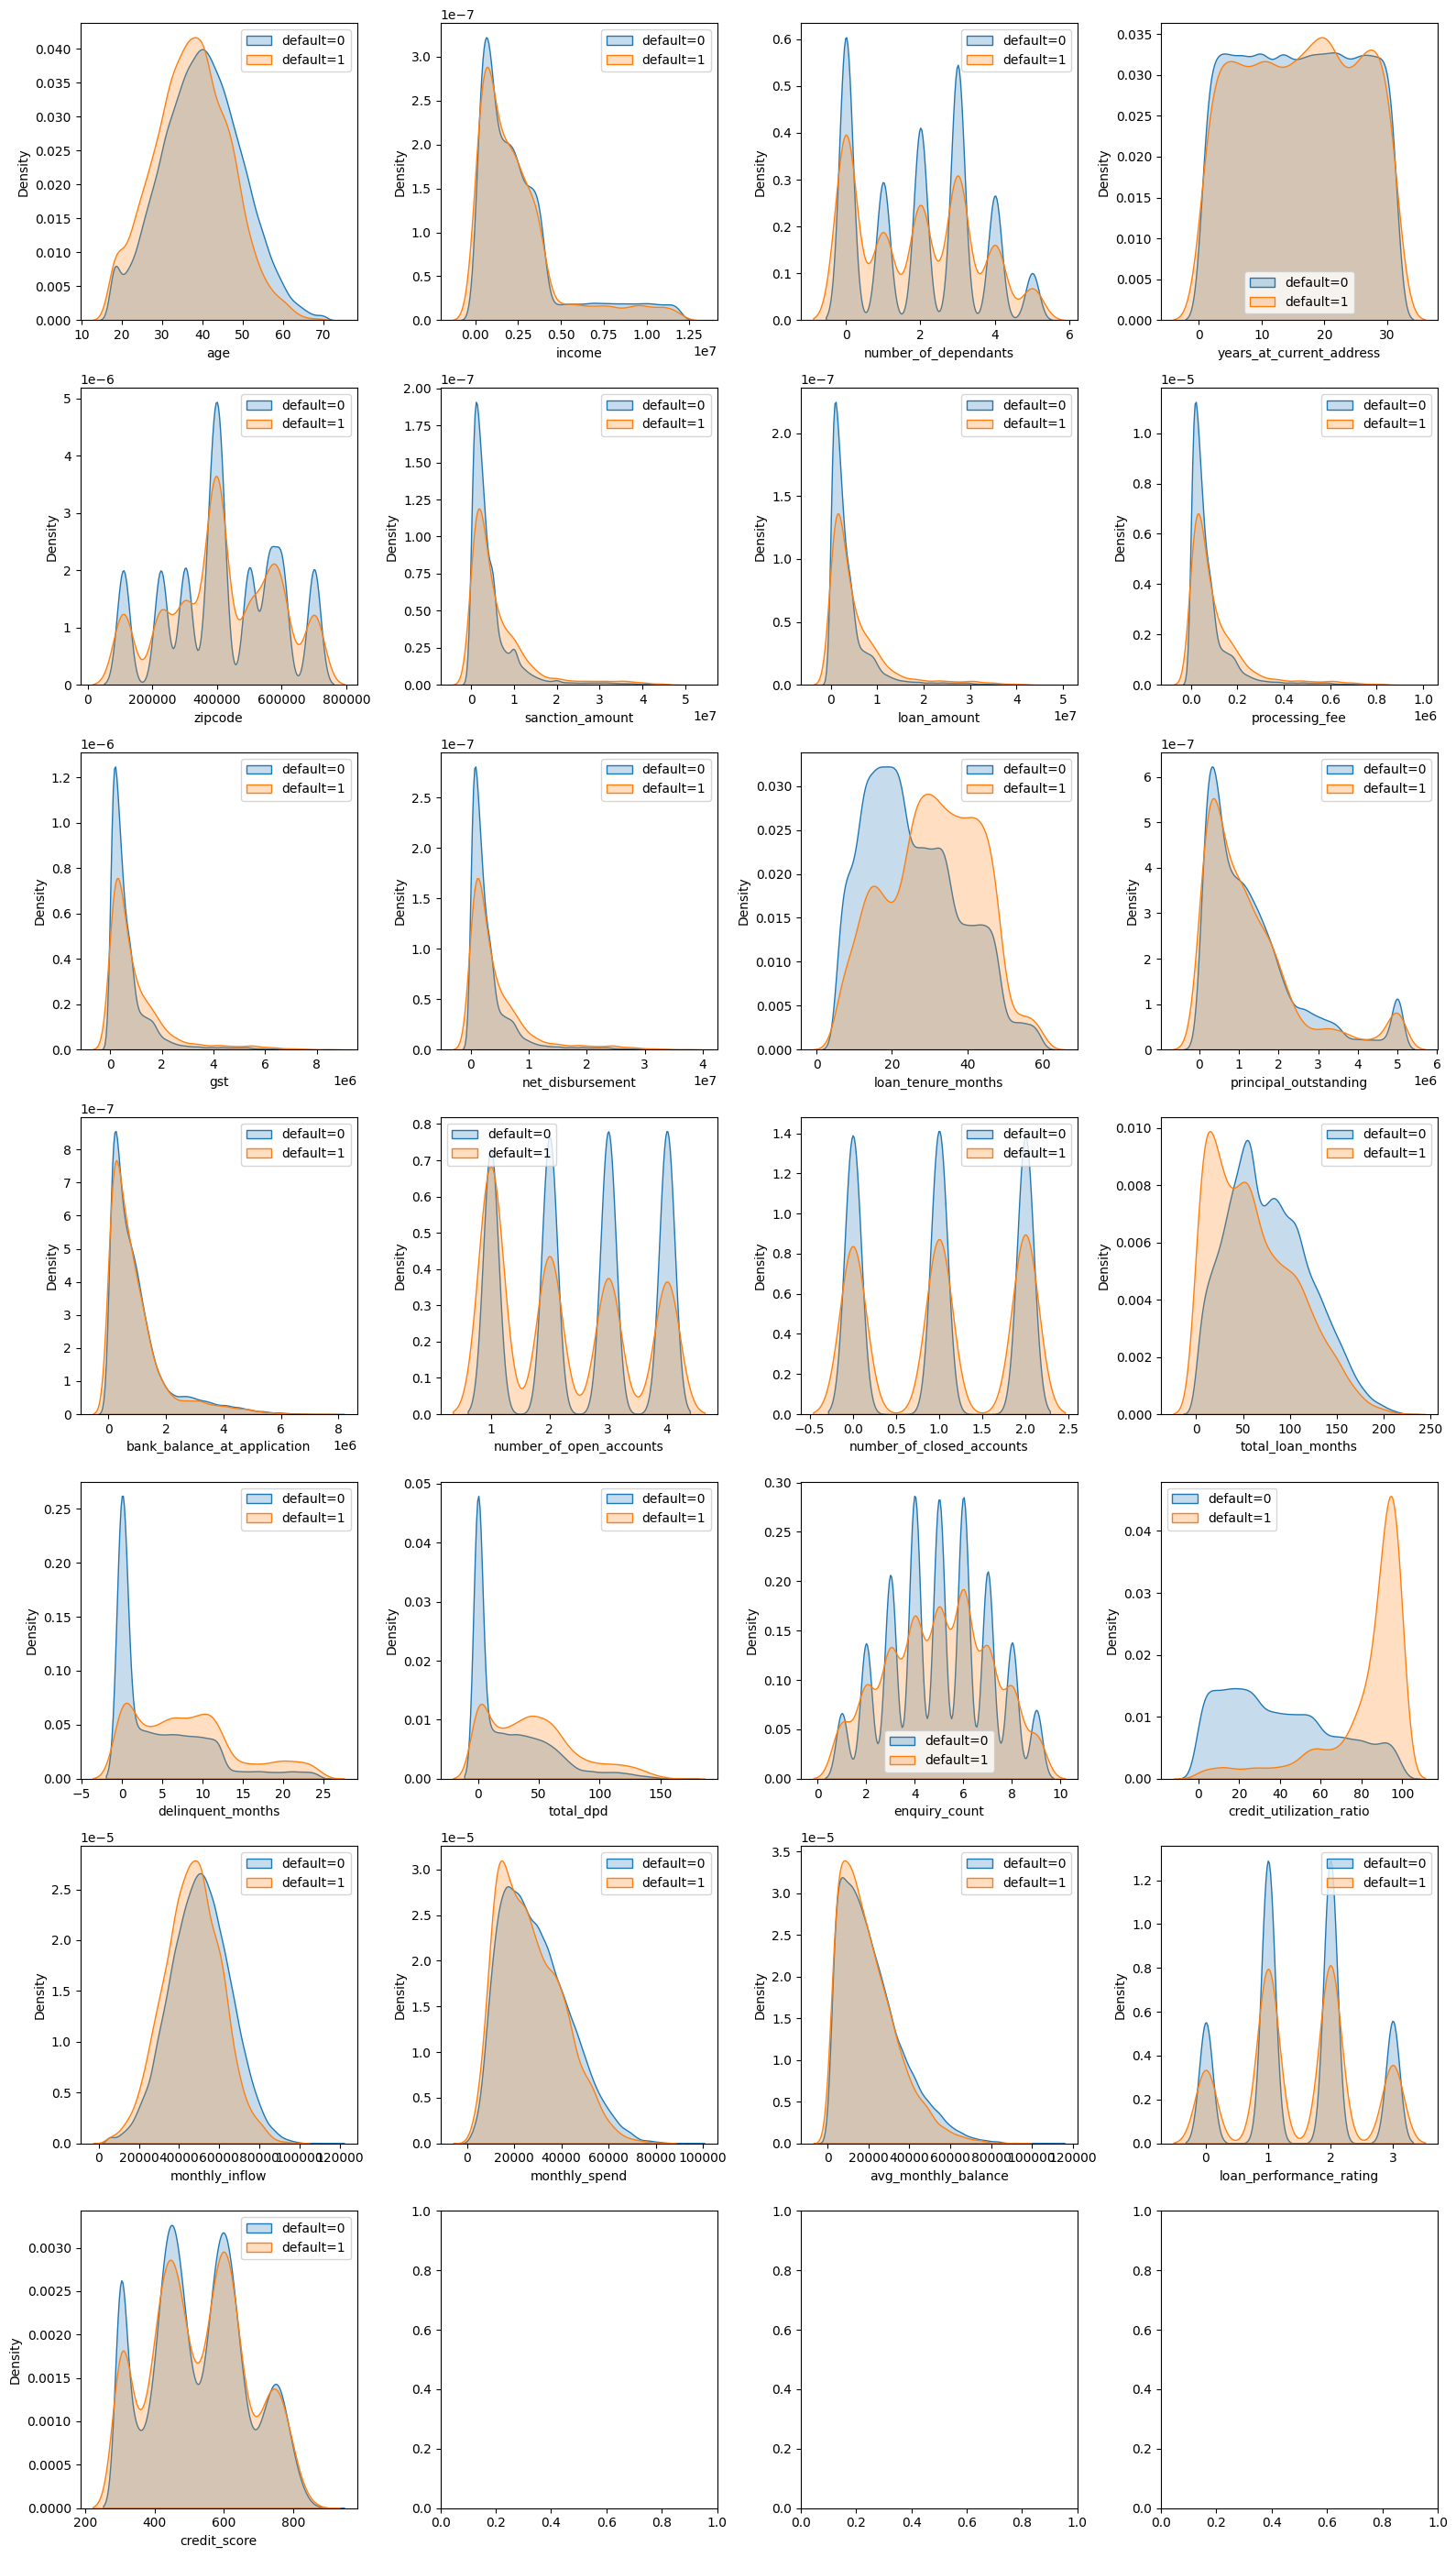

In [37]:
import math

n = len(columns_continuous)
rows = math.ceil(n / 4)  # 4 per row, change if you want

fig, axes = plt.subplots(rows, 4, figsize=(16, rows*4))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.kdeplot(df1[col][df1['default']==0], fill=True, ax=axes[i], label='default=0')
    sns.kdeplot(df1[col][df1['default']==1], fill=True, ax=axes[i], label='default=1')
    axes[i].legend()

plt.tight_layout()


# Feature Engineering part

In [40]:
df1["loan_to_income"]=round(df["loan_amount"]/df["income"],2)

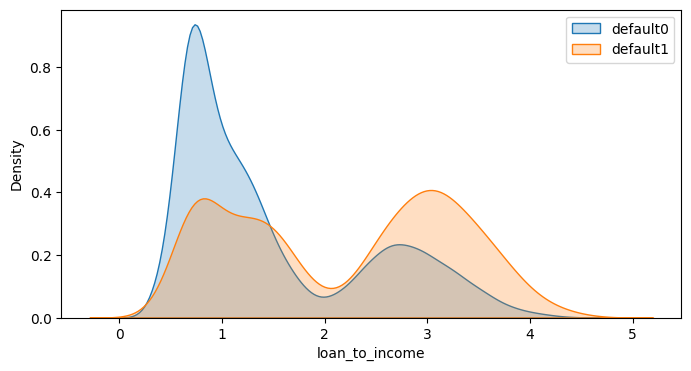

In [41]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1[df1["default"]==0]["loan_to_income"],fill=True,label="default0")
sns.kdeplot(df1[df1["default"]==1]["loan_to_income"],fill=True,label="default1")
plt.legend()
plt.show()

In [42]:
df1['delinquency_ratio'] = (df1['delinquent_months']*100 / df1['total_loan_months']).round(1)


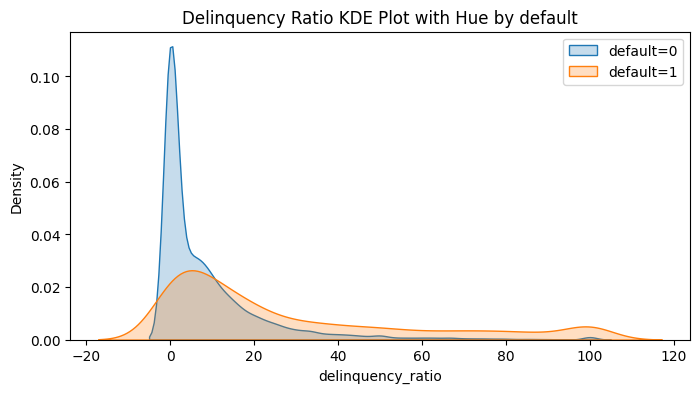

In [43]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1['delinquency_ratio'][df1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df1['delinquency_ratio'][df1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [44]:
df1['avg_dpd_per_delinquency'] = np.where(
    df1['delinquent_months'] != 0,
    (df1['total_dpd'] / df1['delinquent_months']).round(1),
    0
)

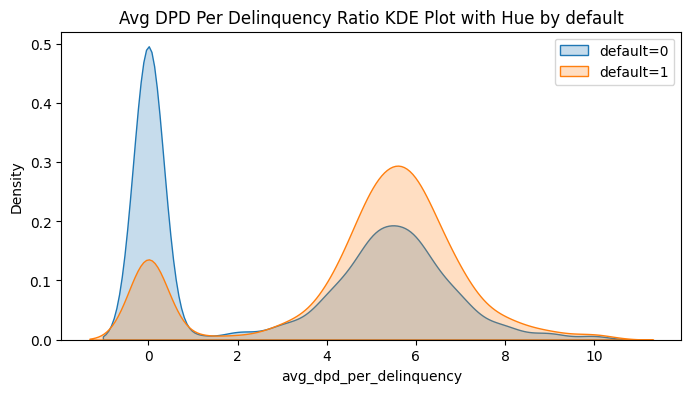

In [45]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1['avg_dpd_per_delinquency'][df1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df1['avg_dpd_per_delinquency'][df1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [46]:
df1['monthly_spent_r']=round(df['monthly_spend']/df['monthly_inflow'])

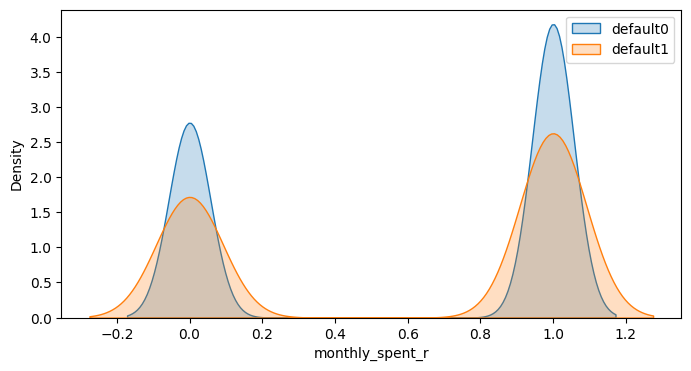

In [47]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1[df1["default"]==0]["monthly_spent_r"],fill=True,label="default0")
sns.kdeplot(df1[df1["default"]==1]["monthly_spent_r"],fill=True,label="default1")
plt.legend()
plt.show()

# Feature Selection

In [49]:
df2 = df1.drop(['cust_id', 'loan_id'],axis="columns")

In [50]:
df3 = df2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

In [51]:
df3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'monthly_inflow', 'monthly_spend',
       'avg_monthly_balance', 'past_loan_count', 'past_defaults',
       'loan_performance_rating', 'credit_score', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency', 'monthly_spent_r'],
      dtype='object')

In [62]:
df3.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,monthly_spend,avg_monthly_balance,past_loan_count,past_defaults,loan_performance_rating,credit_score,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,monthly_spent_r
0,44,M,Married,Self-Employed,3,Owned,27,Delhi,Delhi,110001,...,11609,57376,1,0,2,509,0.95,0.0,0.0,0.0
1,38,M,Married,Salaried,3,Owned,4,Chennai,Tamil Nadu,600001,...,23334,12972,4,0,1,387,3.22,12.5,5.0,0.0
2,46,F,Married,Self-Employed,3,Owned,24,Kolkata,West Bengal,700001,...,52879,5740,2,0,2,605,0.75,29.3,6.1,1.0
3,55,F,Single,Self-Employed,1,Owned,15,Bangalore,Karnataka,560001,...,66348,7336,0,0,1,452,0.49,13.0,5.8,1.0
4,37,M,Married,Salaried,3,Owned,28,Pune,Maharashtra,411001,...,11164,22432,0,0,3,793,1.32,0.0,0.0,0.0


In [66]:
numeric_columns=df3.select_dtypes(include=["int64","float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'monthly_inflow', 'monthly_spend',
       'avg_monthly_balance', 'loan_performance_rating', 'credit_score',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency',
       'monthly_spent_r'],
      dtype='object')

In [72]:
numeric_columns = [
    col for col in df3.select_dtypes(include=["int64","float64"]).columns
    if col != 'default'
]

df_Xtrain4 = df3.drop('default', axis='columns')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_Xtrain4[numeric_columns] = scaler.fit_transform(df_Xtrain4[numeric_columns])


In [78]:
df_Xtrain4[numeric_columns].head()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,...,credit_utilization_ratio,monthly_inflow,monthly_spend,avg_monthly_balance,loan_performance_rating,credit_score,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,monthly_spent_r
0,0.500000,0.6,0.866667,0.000000,0.056291,0.050598,0.050598,0.050598,0.509434,0.321305,...,0.070707,0.467527,0.111028,0.516327,0.666667,0.348333,0.151515,0.000,0.00,0.0
1,0.384615,0.6,0.100000,0.830508,0.078497,0.080240,0.080240,0.080240,0.452830,0.135780,...,0.040404,0.382632,0.234926,0.114796,0.333333,0.145000,0.680653,0.125,0.50,0.0
2,0.538462,0.6,0.766667,1.000000,0.044718,0.044380,0.044380,0.044380,0.283019,0.307607,...,0.585859,0.487717,0.547129,0.049400,0.666667,0.508333,0.104895,0.293,0.61,1.0
3,0.711538,0.2,0.466667,0.762712,0.043643,0.035525,0.035525,0.035525,0.000000,0.246263,...,0.262626,0.604755,0.689456,0.063832,0.333333,0.253333,0.044289,0.130,0.58,1.0
4,0.365385,0.6,0.900000,0.510169,0.087824,0.093575,0.093575,0.093575,0.415094,0.349891,...,0.101010,0.369806,0.106325,0.200340,1.000000,0.821667,0.237762,0.000,0.00,0.0


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] =[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_data

In [82]:
calculate_vif(df_Xtrain4[numeric_columns])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,275.208244
1,number_of_dependants,4.592076
2,years_at_current_address,3.788780
3,zipcode,4.273005
4,sanction_amount,101.422223
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.204649
9,principal_outstanding,16.332251


In [88]:
df_X_train_41=df_Xtrain4.drop(columns=['age','credit_score','monthly_inflow','monthly_spend','loan_performance_rating','avg_monthly_balance','processing_fee', 'gst',"principal_outstanding","sanction_amount"],axis=1)
numeric_columns=df_X_train_41.select_dtypes(["int64","float64"]).columns
calculate_vif(df_X_train_41[numeric_columns])

,feature,VIF
0,number_of_dependants,2.439932
1,years_at_current_address,3.375070
2,zipcode,3.735068
3,net_disbursement,4.663965
4,loan_tenure_months,5.743941
5,bank_balance_at_application,4.173398
6,number_of_open_accounts,4.328342
7,number_of_closed_accounts,2.362095
8,enquiry_count,6.335721
9,credit_utilization_ratio,2.897753


# weight of Evidence and information value

In [91]:
def calculate_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(["count","sum"])
    grouped.rename(columns={"count":"total","sum":"good"},inplace=True)
    grouped["bad"]=grouped["total"]-grouped["good"]
    grouped["good_pct"]=grouped["good"]/grouped["good"].sum()
    grouped["bad_pct"]=grouped["bad"]/grouped["bad"].sum()
    grouped["woe"]=np.log( grouped["good_pct"]/grouped["bad_pct"])
    grouped["iv"]= grouped["woe"]*(grouped["good_pct"]-grouped["bad_pct"])
    total_iv = grouped['iv'].sum()
    return total_iv

In [95]:
import numpy as np
iv_values = {}

for feature in df_X_train_41.columns:
    
    # Check categorical
    if df_X_train_41[feature].dtype == "object":
        temp_df = pd.concat([df_X_train_41[[feature]], df3['default']], axis=1)
        iv = calculate_iv(temp_df, feature, "default")
    
    else:
        # Bin numerical vars
        X_binned = pd.cut(df_X_train_41[feature], bins=10, labels=False).to_frame(feature)
        temp_df = pd.concat([X_binned, df3['default']], axis=1)
        iv = calculate_iv(temp_df, feature, "default")
    
    iv_values[feature] = iv

iv_values


C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'gender': np.float64(0.0003939200223230576),
 'marital_status': np.float64(0.001925975658117442),
 'employment_status': np.float64(0.002947939001510809),
 'number_of_dependants': np.float64(0.003496877230481364),
 'residence_type': np.float64(0.24729142378232133),
 'years_at_current_address': np.float64(0.001619829649071367),
 'city': np.float64(0.0014000241730758277),
 'state': np.float64(0.0012663165277002064),
 'zipcode': np.float64(0.0013580042818183823),
 'loan_purpose': np.float64(0.3848104269024987),
 'loan_type': np.float64(0.16781384474824673),
 'net_disbursement': np.float64(0.09677685764057176),
 'loan_tenure_months': np.float64(0.2203789862946433),
 'bank_balance_at_application': np.float64(0.005774242416399056),
 'number_of_open_accounts': np.float64(0.08319511085396353),
 'number_of_closed_accounts': np.float64(0.0008432568329858312),
 'enquiry_count': np.float64(0.0076624458396474604),
 'credit_utilization_ratio': np.float64(2.413914848569892),
 'past_loan_count': np.fl

In [97]:
iv_df=pd.DataFrame(iv_values.items(),columns=["feature","iv"])
iv_df

,feature,iv
0,gender,0.000394
1,marital_status,0.001926
2,employment_status,0.002948
3,number_of_dependants,0.003497
4,residence_type,0.247291
5,years_at_current_address,0.001620
6,city,0.001400
7,state,0.001266
8,zipcode,0.001358
9,loan_purpose,0.384810


In [99]:
selected_features=[]
selected_features = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features

['residence_type',
 'loan_purpose',
 'loan_type',
 'net_disbursement',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'past_loan_count',
 'past_defaults',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [101]:
df_train5 = df_X_train_41[selected_features]


In [103]:
df_train5.head()

,residence_type,loan_purpose,loan_type,net_disbursement,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,past_loan_count,past_defaults,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
0,Owned,Auto,Secured,0.050598,0.509434,0.000000,0.070707,1,0,0.151515,0.000,0.00
1,Owned,Home,Secured,0.080240,0.452830,0.666667,0.040404,4,0,0.680653,0.125,0.50
2,Owned,Personal,Unsecured,0.044380,0.283019,0.333333,0.585859,2,0,0.104895,0.293,0.61
3,Owned,Personal,Unsecured,0.035525,0.000000,0.666667,0.262626,0,0,0.044289,0.130,0.58
4,Owned,Auto,Secured,0.093575,0.415094,1.000000,0.101010,0,0,0.237762,0.000,0.00


# Applying one hot encoding

In [246]:
df_train_encoded = pd.get_dummies(df_train5, drop_first=True)
df_train_encoded.head(3)

,net_disbursement,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,past_loan_count,past_defaults,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
0,0.050598,0.509434,0.000000,0.070707,1,0,0.151515,0.000,0.00,True,False,False,False,False,False
1,0.080240,0.452830,0.666667,0.040404,4,0,0.680653,0.125,0.50,True,False,False,True,False,False
2,0.044380,0.283019,0.333333,0.585859,2,0,0.104895,0.293,0.61,True,False,False,False,True,True


In [108]:
df_train_encoded.columns

Index(['net_disbursement', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'past_loan_count', 'past_defaults',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train_encoded,df3["default"], test_size=0.2, random_state=42)

In [112]:
X_train.shape

(39988, 15)

In [114]:
y_train.shape

(39988,)

# Training model

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9616885065519656
[[9045  126]
 [ 257  569]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9171
           1       0.82      0.69      0.75       826

    accuracy                           0.96      9997
   macro avg       0.90      0.84      0.86      9997
weighted avg       0.96      0.96      0.96      9997



In [128]:
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier()
Rfc.fit(X_train,y_train)
y_pred=Rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9624887466239872
[[9062  109]
 [ 266  560]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9171
           1       0.84      0.68      0.75       826

    accuracy                           0.96      9997
   macro avg       0.90      0.83      0.86      9997
weighted avg       0.96      0.96      0.96      9997



In [130]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [15:35:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9623887166149845
[[9013  158]
 [ 218  608]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9171
           1       0.79      0.74      0.76       826

    accuracy                           0.96      9997
   macro avg       0.89      0.86      0.87      9997
weighted avg       0.96      0.96      0.96      9997



In [137]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


[LightGBM] [Info] Number of positive: 3471, number of negative: 36517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 39988, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086801 -> initscore=-2.353335
[LightGBM] [Info] Start training from score -2.353335


In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision / Recall / F1 Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC Score (uses predicted probability)
y_prob = model.predict_proba(X_test)[:,1]
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))



Accuracy: 0.9644893468040412

Confusion Matrix:
[[9022  149]
 [ 206  620]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9171
           1       0.81      0.75      0.78       826

    accuracy                           0.96      9997
   macro avg       0.89      0.87      0.88      9997
weighted avg       0.96      0.96      0.96      9997


ROC AUC Score: 0.9869367938678162


# RandomizedSearchCv

In [144]:
from sklearn.model_selection import RandomizedSearchCV
log_reg=LogisticRegression(max_iter=1000)
param_grid={'C': np.logspace(-4, 4, 20), "solver":["newton-cg", "sag","lbfgs"]}
random_search=RandomizedSearchCV(log_reg,param_distributions=param_grid,n_iter=50, scoring='f1', n_jobs=-1,cv=3,verbose=2,random_state=42)
random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")
best_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': np.float64(3792.690190732246)}
Best Score: 0.7696959008968619


In [148]:
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9171
           1       0.81      0.70      0.75       826

    accuracy                           0.96      9997
   macro avg       0.89      0.84      0.87      9997
weighted avg       0.96      0.96      0.96      9997



In [152]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0] 
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7958874817532647


In [156]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9171
           1       0.75      0.82      0.78       826

    accuracy                           0.96      9997
   macro avg       0.87      0.90      0.88      9997
weighted avg       0.96      0.96      0.96      9997



In [158]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import randint, uniform

# Base model
lgbm = LGBMClassifier(objective='binary', boosting_type='gbdt', n_jobs=-1)

# Search space
param_dist = {
    'num_leaves': randint(20, 200),
    'max_depth': randint(3, 12),
    'learning_rate': uniform(0.005, 0.3),
    'n_estimators': randint(100, 1000),
    'min_child_samples': randint(10, 200),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Randomized Search (fast)
lgb_random = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=25,        # reduce if slow, increase if want more search
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
lgb_random.fit(X_train, y_train)

print("Best Parameters:", lgb_random.best_params_)

# Predict
best_model = lgb_random.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_prob))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Info] Number of positive: 3471, number of negative: 36517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 39988, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086801 -> initscore=-2.353335
[LightGBM] [Info] Start training from score -2.353335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

# underSampling

In [160]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X_train_res,y_train_res=rus.fit_resample(X_train,y_train)

C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [161]:
y_train.value_counts()

default
0    36517
1     3471
Name: count, dtype: int64

In [162]:
y_train_res.value_counts()

default
0    3471
1    3471
Name: count, dtype: int64

In [173]:
model = LogisticRegression(solver='sag', C=29.763514416313132)
model.fit(X_train_res,y_train_res)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      9171
           1       0.52      0.95      0.68       826

    accuracy                           0.92      9997
   macro avg       0.76      0.94      0.82      9997
weighted avg       0.96      0.92      0.93      9997



C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [177]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      9171
           1       0.51      0.98      0.67       826

    accuracy                           0.92      9997
   macro avg       0.76      0.95      0.81      9997
weighted avg       0.96      0.92      0.93      9997



# oversampling

In [182]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
y_train_smt.value_counts()

C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\amres\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is dep

default
0    36447
1    36447
Name: count, dtype: int64

In [186]:
model = LogisticRegression(solver='sag', C=29.763514416313132)
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9171
           1       0.56      0.94      0.70       826

    accuracy                           0.93      9997
   macro avg       0.78      0.94      0.83      9997
weighted avg       0.96      0.93      0.94      9997



In [190]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      9171
           1       0.58      0.95      0.72       826

    accuracy                           0.94      9997
   macro avg       0.79      0.94      0.84      9997
weighted avg       0.96      0.94      0.95      9997



# Optuna

In [193]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [195]:
def objective(trial):
    param={'C':trial.suggest_float('C', 1e-4, 1e4, log=True),
    'solver':trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),
    'tol':trial.suggest_float('tol', 1e-6, 1e-1, log=True),
    'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])}
    model = LogisticRegression(**param, max_iter=10000)
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    return np.mean(scores)

In [197]:
study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2026-01-18 16:02:38,059] A new study created in memory with name: no-name-427de1ae-1f18-4305-a1cc-043a0bec7164
[I 2026-01-18 16:02:41,764] Trial 0 finished with value: 0.9412914379741214 and parameters: {'C': 0.04920045161082616, 'solver': 'saga', 'tol': 6.917717138890534e-05, 'class_weight': None}. Best is trial 0 with value: 0.9412914379741214.
[I 2026-01-18 16:02:44,009] Trial 1 finished with value: 0.8701103518253834 and parameters: {'C': 0.00033243895035719084, 'solver': 'newton-cg', 'tol': 0.0007827396236972831, 'class_weight': None}. Best is trial 0 with value: 0.9412914379741214.
[I 2026-01-18 16:02:46,402] Trial 2 finished with value: 0.9074531357668075 and parameters: {'C': 0.0010297952590232274, 'solver': 'saga', 'tol': 0.0065445260338867425, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9412914379741214.
[I 2026-01-18 16:02:50,660] Trial 3 finished with value: 0.9484340013179137 and parameters: {'C': 586.6632268844014, 'solver': 'saga', 'tol': 3.901804935255

In [198]:
study_logistic .best_params

{'C': 3400.127086838753,
 'solver': 'saga',
 'tol': 0.005301821801668813,
 'class_weight': None}

In [201]:
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9171
           1       0.56      0.94      0.70       826

    accuracy                           0.93      9997
   macro avg       0.78      0.94      0.83      9997
weighted avg       0.96      0.93      0.94      9997



In [203]:
best_model_logistic

LogisticRegression(C=3400.127086838753, solver='saga', tol=0.005301821801668813)

# ROC-AUC CURVE

In [207]:
from sklearn.metrics import roc_curve

probabilities =best_model_logistic.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00010904, 0.00010904]),
 array([0.        , 0.00121065, 0.18159806, 0.18159806, 0.19975787]),
 array([       inf, 0.99999996, 0.99924813, 0.99924722, 0.99885588]))

In [210]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area.round(2)

np.float64(0.98)

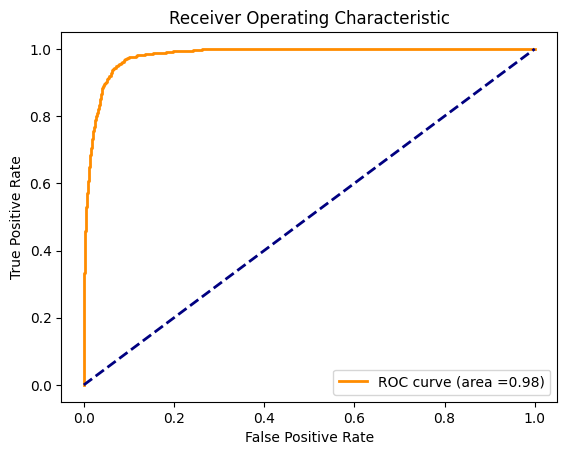

In [212]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area ={area.round(2)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [216]:
df_imp=pd.DataFrame()
df_imp["feature"]=X_train.columns
df_imp["coefficients"]=best_model_logistic.coef_[0]
df_imp=df_imp.sort_values(by="coefficients",ascending=False)

<Axes: xlabel='coefficients', ylabel='feature'>

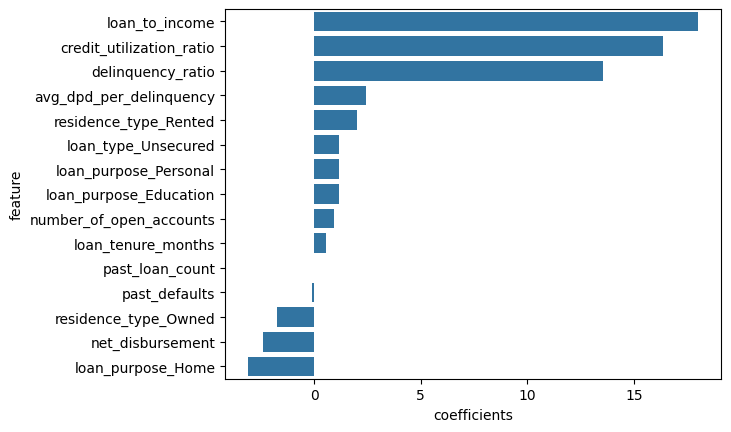

In [218]:
sns.barplot(x=df_imp["coefficients"],y=df_imp["feature"])

In [222]:
probabilities = best_model_logistic.predict_proba(X_test)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
18112,0,0.000012
48179,0,0.000003
30595,0,0.001433


In [224]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
18112,0,0.000012,2
48179,0,0.000003,1
30595,0,0.001433,5


In [226]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count    1000.000000
mean        0.453355
std         0.173307
min         0.192558
25%         0.297998
50%         0.437818
75%         0.602344
max         0.776989
Name: Default Probability, dtype: float64

In [228]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\amres\AppData\Local\Temp\ipykernel_23152\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,1.172088e-09,4.695919e-07,0.0,1000.0
1,1,4.739913e-07,3.904644e-06,0.0,1000.0
2,2,3.921633e-06,1.968386e-05,0.0,999.0
3,3,1.971459e-05,1.080898e-04,0.0,1000.0
4,4,1.084817e-04,5.819754e-04,0.0,1000.0
5,5,5.834821e-04,3.510734e-03,0.0,999.0
6,6,3.518574e-03,2.493474e-02,4.0,996.0
7,7,2.497460e-02,1.920322e-01,11.0,988.0
8,8,1.925576e-01,7.769888e-01,125.0,875.0
9,9,7.773792e-01,1.000000e+00,686.0,314.0


In [230]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,1.172088e-09,4.695919e-07,0.0,1000.0,0.000000,100.000000
1,1,4.739913e-07,3.904644e-06,0.0,1000.0,0.000000,100.000000
2,2,3.921633e-06,1.968386e-05,0.0,999.0,0.000000,100.000000
3,3,1.971459e-05,1.080898e-04,0.0,1000.0,0.000000,100.000000
4,4,1.084817e-04,5.819754e-04,0.0,1000.0,0.000000,100.000000
5,5,5.834821e-04,3.510734e-03,0.0,999.0,0.000000,100.000000
6,6,3.518574e-03,2.493474e-02,4.0,996.0,0.400000,99.600000
7,7,2.497460e-02,1.920322e-01,11.0,988.0,1.101101,98.898899
8,8,1.925576e-01,7.769888e-01,125.0,875.0,12.500000,87.500000
9,9,7.773792e-01,1.000000e+00,686.0,314.0,68.600000,31.400000


In [232]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,7.773792e-01,1.000000e+00,686.0,314.0,68.600000,31.400000
1,8,1.925576e-01,7.769888e-01,125.0,875.0,12.500000,87.500000
2,7,2.497460e-02,1.920322e-01,11.0,988.0,1.101101,98.898899
3,6,3.518574e-03,2.493474e-02,4.0,996.0,0.400000,99.600000
4,5,5.834821e-04,3.510734e-03,0.0,999.0,0.000000,100.000000
5,4,1.084817e-04,5.819754e-04,0.0,1000.0,0.000000,100.000000
6,3,1.971459e-05,1.080898e-04,0.0,1000.0,0.000000,100.000000
7,2,3.921633e-06,1.968386e-05,0.0,999.0,0.000000,100.000000
8,1,4.739913e-07,3.904644e-06,0.0,1000.0,0.000000,100.000000
9,0,1.172088e-09,4.695919e-07,0.0,1000.0,0.000000,100.000000


In [234]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,7.773792e-01,1.000000e+00,686.0,314.0,68.600000,31.400000,686.0,314.0
1,8,1.925576e-01,7.769888e-01,125.0,875.0,12.500000,87.500000,811.0,1189.0
2,7,2.497460e-02,1.920322e-01,11.0,988.0,1.101101,98.898899,822.0,2177.0
3,6,3.518574e-03,2.493474e-02,4.0,996.0,0.400000,99.600000,826.0,3173.0
4,5,5.834821e-04,3.510734e-03,0.0,999.0,0.000000,100.000000,826.0,4172.0
5,4,1.084817e-04,5.819754e-04,0.0,1000.0,0.000000,100.000000,826.0,5172.0
6,3,1.971459e-05,1.080898e-04,0.0,1000.0,0.000000,100.000000,826.0,6172.0
7,2,3.921633e-06,1.968386e-05,0.0,999.0,0.000000,100.000000,826.0,7171.0
8,1,4.739913e-07,3.904644e-06,0.0,1000.0,0.000000,100.000000,826.0,8171.0
9,0,1.172088e-09,4.695919e-07,0.0,1000.0,0.000000,100.000000,826.0,9171.0


In [236]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,7.773792e-01,1.000000e+00,686.0,314.0,68.600000,31.400000,686.0,314.0,83.050847,3.423836
1,8,1.925576e-01,7.769888e-01,125.0,875.0,12.500000,87.500000,811.0,1189.0,98.184019,12.964780
2,7,2.497460e-02,1.920322e-01,11.0,988.0,1.101101,98.898899,822.0,2177.0,99.515738,23.737869
3,6,3.518574e-03,2.493474e-02,4.0,996.0,0.400000,99.600000,826.0,3173.0,100.000000,34.598190
4,5,5.834821e-04,3.510734e-03,0.0,999.0,0.000000,100.000000,826.0,4172.0,100.000000,45.491222
5,4,1.084817e-04,5.819754e-04,0.0,1000.0,0.000000,100.000000,826.0,5172.0,100.000000,56.395159
6,3,1.971459e-05,1.080898e-04,0.0,1000.0,0.000000,100.000000,826.0,6172.0,100.000000,67.299095
7,2,3.921633e-06,1.968386e-05,0.0,999.0,0.000000,100.000000,826.0,7171.0,100.000000,78.192127
8,1,4.739913e-07,3.904644e-06,0.0,1000.0,0.000000,100.000000,826.0,8171.0,100.000000,89.096064
9,0,1.172088e-09,4.695919e-07,0.0,1000.0,0.000000,100.000000,826.0,9171.0,100.000000,100.000000


In [238]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,7.773792e-01,1.000000e+00,686.0,314.0,68.600000,31.400000,686.0,314.0,83.050847,3.423836,79.627011
1,8,1.925576e-01,7.769888e-01,125.0,875.0,12.500000,87.500000,811.0,1189.0,98.184019,12.964780,85.219239
2,7,2.497460e-02,1.920322e-01,11.0,988.0,1.101101,98.898899,822.0,2177.0,99.515738,23.737869,75.777869
3,6,3.518574e-03,2.493474e-02,4.0,996.0,0.400000,99.600000,826.0,3173.0,100.000000,34.598190,65.401810
4,5,5.834821e-04,3.510734e-03,0.0,999.0,0.000000,100.000000,826.0,4172.0,100.000000,45.491222,54.508778
5,4,1.084817e-04,5.819754e-04,0.0,1000.0,0.000000,100.000000,826.0,5172.0,100.000000,56.395159,43.604841
6,3,1.971459e-05,1.080898e-04,0.0,1000.0,0.000000,100.000000,826.0,6172.0,100.000000,67.299095,32.700905
7,2,3.921633e-06,1.968386e-05,0.0,999.0,0.000000,100.000000,826.0,7171.0,100.000000,78.192127,21.807873
8,1,4.739913e-07,3.904644e-06,0.0,1000.0,0.000000,100.000000,826.0,8171.0,100.000000,89.096064,10.903936
9,0,1.172088e-09,4.695919e-07,0.0,1000.0,0.000000,100.000000,826.0,9171.0,100.000000,100.000000,0.000000


In [243]:

gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9820541801546774
Gini Coefficient: 0.9641083603093548
